In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hamoye-stage-c/Data_for_UCI_named.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Dataset is now stored in a Pandas Dataframe
Data = pd.read_csv('/kaggle/input/hamoye-stage-c/Data_for_UCI_named.csv')

In [4]:
Data.head(5)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [5]:
Data.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
Data.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [8]:
Data = Data.drop('stab', axis=1)

In [9]:
Data.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stabf'],
      dtype='object')

In [10]:
Data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [11]:
Data.nunique()

tau1     10000
tau2     10000
tau3     10000
tau4     10000
p1       10000
p2       10000
p3       10000
p4       10000
g1       10000
g2       10000
g3       10000
g4       10000
stabf        2
dtype: int64

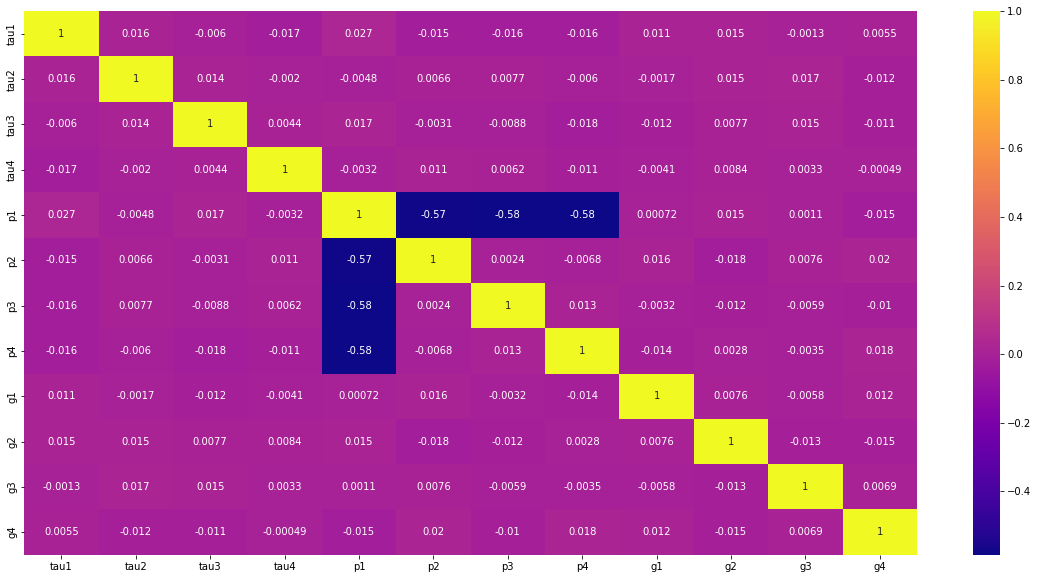

In [12]:
# Generate a correlation map of the data
plt.figure(figsize=(20,10))
sns.heatmap(Data.corr(), annot=True, cmap='plasma')
plt.show()

In [13]:
#splitting features and target variable
x = Data.drop('stabf', axis=1)
y = Data['stabf']

### MODELLING AND PREPROCESSING

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=1)
scaler = StandardScaler() 
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [15]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_train = pd.DataFrame(scaled_x_train,columns = x_train.columns)
scaled_x_test = scaler.transform(x_test)
scaled_x_test = pd.DataFrame(scaled_x_test, columns = x_test.columns)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(random_state=1)

In [17]:
#fit the random forest model to the training dataset
rfr.fit(scaled_x_train, y_train)
#obtain predictions
predicted_values = rfr.predict(scaled_x_test)

In [18]:
# Obtain the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_values)
round(accuracy, 4) 

0.929

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state = 1)
#fit the extra trees model to the training dataset
etc.fit(scaled_x_train, y_train)
#obtain predictions
predicted_values = etc.predict(scaled_x_test)

In [20]:
# Obtain the accuracy
accuracy = accuracy_score(y_test, predicted_values)
round(accuracy, 4) 

0.928

In [21]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(random_state=1)
#fit the xgboost model to the training dataset
xgbc.fit(scaled_x_train, y_train)
#obtain predictions
predicted_values = xgbc.predict(scaled_x_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:33:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [22]:
# Obtain the accuracy
accuracy = accuracy_score(y_test, predicted_values)
round(accuracy, 4) 

0.9455

In [23]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=1)
#fit the lightgbm model to the training dataset
lgbm.fit(scaled_x_train, y_train)
#obtain predictions
predicted_values = lgbm.predict(scaled_x_test)

In [24]:
# Obtain the accuracy
accuracy = accuracy_score(y_test, predicted_values)
round(accuracy, 4)

0.9395

In [25]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [50,100,300,500,1000] 
min_samples_split = [2,3,5,7,9] 
min_samples_leaf = [1,2,4,6,8] 
max_features = ['auto','sqrt','log2',None] 
hyperparameter_grid = {'n_estimators':n_estimators,
                       'min_samples_leaf':min_samples_leaf,
                       'min_samples_split':min_samples_split,
                       'max_features':max_features}


In [26]:
rand_search = RandomizedSearchCV(estimator = etc,param_distributions=hyperparameter_grid,random_state=1)
rand_search = rand_search.fit(scaled_x_train,y_train)

In [27]:
rand_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [28]:
n_classifier = ExtraTreesClassifier(random_state=1,n_estimators = 1000,
                                       min_samples_leaf= 8,max_features=None,
                                       min_samples_split=2)
n_classifier.fit(scaled_x_train,y_train)
predicted_values = n_classifier.predict(scaled_x_test)

In [29]:
# Obtain the accuracy
accuracy = accuracy_score(y_test, predicted_values)
round(accuracy, 4)

0.927

In [30]:
imp = rand_search.best_estimator_.feature_importances_
feat_imp = pd.DataFrame()
feat_imp['feature'] = x.columns
feat_imp['importance'] = imp
feat_imp.head()

,feature,importance
0,tau1,0.137240
1,tau2,0.140508
2,tau3,0.134680
3,tau4,0.135417
4,p1,0.003683


In [31]:
feat_imp.sort_values(by='importance', ascending=False)

,feature,importance
1,tau2,0.140508
0,tau1,0.137240
3,tau4,0.135417
2,tau3,0.134680
10,g3,0.113063
11,g4,0.109541
9,g2,0.107578
8,g1,0.102562
6,p3,0.005429
5,p2,0.005337


### Merci Beaucoup